# Binomial Distribution

Some example code for the binomial distribution.

Taken from: https://www.statology.org/binomial-distribution-python/

You should answer the questions in the slides using code.

See if you can re-create some of the plots of the Binomial too.

## 1. Simulating random variables from a Binomial distribution

In [6]:
import numpy as np
from numpy import random

# Generate an array of 10 values that follow a binomial distribution
random.binomial(n=10, p=.25, size=10)

array([0, 3, 3, 2, 1, 1, 3, 1, 1, 3])

In [7]:
# If we want a bigger sample?
random.binomial(n=10, p=.25, size=int(1e2))

array([5, 0, 2, 4, 3, 3, 2, 4, 3, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 4, 2, 4,
       2, 1, 2, 1, 4, 0, 3, 3, 4, 1, 4, 2, 3, 2, 4, 2, 1, 2, 1, 4, 1, 2,
       5, 6, 2, 4, 2, 3, 4, 3, 3, 0, 2, 1, 2, 2, 3, 0, 2, 2, 3, 2, 0, 4,
       3, 4, 2, 3, 2, 3, 2, 2, 0, 2, 1, 3, 3, 2, 2, 1, 5, 2, 2, 5, 2, 2,
       2, 3, 4, 1, 2, 4, 3, 3, 0, 2, 3, 2])

In [8]:
# What if I want everyone to have the same sample?
random.seed(10)
random.binomial(n=10, p=.25, size=10)

# Why would we want that?

array([3, 0, 3, 3, 2, 1, 1, 3, 1, 1])

## 2. Calculating single probablities using the Binomial distribution

In [9]:
# Let's use the first example in the slides:
from scipy.stats import binom

# Calculate binomial probability P(X = 4) when X ~ Binom(n = 6, p = 0.7)
binom.pmf(k=4, n=6, p=0.7)

0.32413499999999995

In [10]:
# Calculating explicitly takes more effort and is less easy to edit for new problems:
from math import factorial
n = 6
p = 0.7
q = 0.3
x = 4
factorial(n) / (factorial(x) * factorial(n - x)) * pow(p, x) * pow(1 - p, n - x)

0.324135

In [11]:
# Printing all probabilities:
x = np.array([0, 1, 2, 3, 4, 5, 6])
out1 = binom.pmf(k=x, n=6, p=0.7)
out1

array([0.000729, 0.010206, 0.059535, 0.18522 , 0.324135, 0.302526,
       0.117649])

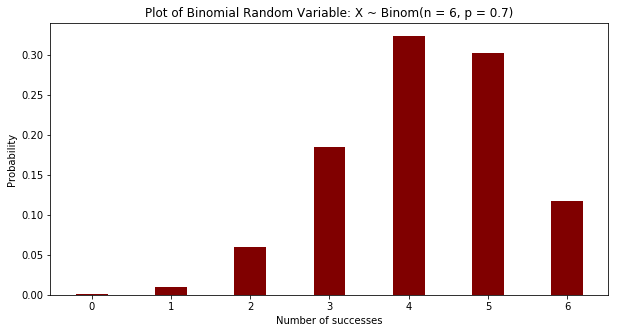

In [13]:
# Creating a plot:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(x, out1, color ='maroon', width = 0.4)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.title("Plot of Binomial Random Variable: X ~ Binom(n = 6, p = 0.7)")
plt.show()


## 3. Calculating cumulative probablities using the Binomial distribution

In [14]:
# Calculate binomial probability P(X <= 3) when X ~ Binom(n = 6, p = 0.7)
binom.cdf(k=3, n=6, p=0.7)


0.25569000000000003

In [15]:
# Seeing what this actually does:
out2 = binom.cdf(k=x, n=6, p=0.7)
out2

array([7.29000e-04, 1.09350e-02, 7.04700e-02, 2.55690e-01, 5.79825e-01,
       8.82351e-01, 1.00000e+00])

## 4. Visualising a random sample from the Binomial:

Counter({4: 306, 5: 302, 3: 194, 6: 133, 2: 56, 1: 9})


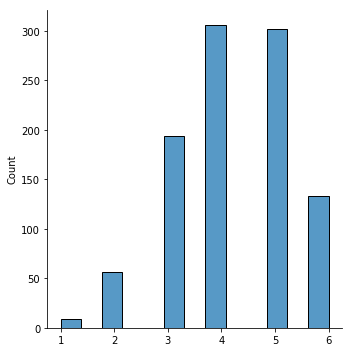

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

y = random.binomial(n=6, p=0.7, size=1000)

# Find the frequencies:
freq = Counter(y)
print(freq)

sns.displot(y)

plt.show()
# More on displot: https://seaborn.pydata.org/generated/seaborn.displot.html

## Some further reading:

Code above adapted from here:
https://www.statology.org/binomial-distribution-python/

Look at the examples and the plots here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

See how to make barplots neater here:
https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4
and here:
https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
and here:
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

And a nice page on the Binomial here:
https://www.geeksforgeeks.org/python-binomial-distribution/

## 5. Fitting a Binomial distribution to given data:

In [18]:
# First, let's simulate some data:
from scipy.stats import binom
from numpy import random
random.seed(13)
out = random.binomial(n=10, p=.25, size=1)
out
# This could be number of successes or responses out of 10 trials:

array([4])

In [22]:
# What is my best guess at the population parameter p if I can only see the data?
p_hat = out / 10
p_hat
# This makes sense - out of 10 trials, I have 4 successes/responses. My best guess at p
# is 4/10 = 0.4
# I can then use this distribution to make predictions for the number of
# successes out of 30 trials, for example, using p_hat = 0.4, and I can use
# plots to see how well these fit to my existing data

array([0.4])

### Task:

1. See what is happening here - this is a very important idea called Maximum Likelihood Estimation: https://online.stat.psu.edu/stat504/lesson/1/1.5
2. See if you can re-produce the plot at the above link, but in Python code.